# Homework 4

# Question 1

In [12]:
import sqlite3 as sq3
import pandas as pd

con = sq3.connect("opioid.db")

population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)

con.close

<function Connection.close()>

In [15]:
annual[annual['countyfips']=="NA"].head(10)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
187,188,ADJUNTAS,PR,2006,147,102800,NA
188,189,ADJUNTAS,PR,2007,153,104800,NA
189,190,ADJUNTAS,PR,2008,153,45400,NA
190,191,ADJUNTAS,PR,2009,184,54200,NA
191,192,ADJUNTAS,PR,2010,190,56200,NA
192,193,ADJUNTAS,PR,2011,186,65530,NA
193,194,ADJUNTAS,PR,2012,138,57330,NA
194,195,ADJUNTAS,PR,2013,138,65820,NA
195,196,ADJUNTAS,PR,2014,90,59490,NA
196,197,AGUADA,PR,2006,160,49200,NA


In [16]:
annual[(annual['countyfips']=="NA") & (annual['BUYER_STATE']!= "PR")].head(10)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
10071,10072,GUAM,GU,2006,319,265348,NA
10072,10073,GUAM,GU,2007,330,275600,NA
10073,10074,GUAM,GU,2008,313,286900,NA
10074,10075,GUAM,GU,2009,390,355300,NA
10075,10076,GUAM,GU,2010,510,413800,NA
10076,10077,GUAM,GU,2011,559,475600,NA
10077,10078,GUAM,GU,2012,616,564800,NA
10078,10079,GUAM,GU,2013,728,623200,NA
10079,10080,GUAM,GU,2014,712,558960,NA
17429,17430,MONTGOMERY,AR,2006,469,175390,NA


In [17]:
updated = (annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY']=="MONTGOMERY")
annual.loc[updated,'countyfips']= 5097
annual[(annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY']=="MONTGOMERY")]

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,5097
17430,17431,MONTGOMERY,AR,2007,597,241270,5097
17431,17432,MONTGOMERY,AR,2008,561,251760,5097
17432,17433,MONTGOMERY,AR,2009,554,244160,5097
17433,17434,MONTGOMERY,AR,2010,449,247990,5097
17434,17435,MONTGOMERY,AR,2011,560,313800,5097
17435,17436,MONTGOMERY,AR,2012,696,339520,5097
17436,17437,MONTGOMERY,AR,2013,703,382300,5097
17437,17438,MONTGOMERY,AR,2014,491,396900,5097


In [18]:
annual = annual[annual.BUYER_COUNTY != "NA"]
annual.head()

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,1,ABBEVILLE,SC,2006,877,363620,45001
1,2,ABBEVILLE,SC,2007,908,402940,45001
2,3,ABBEVILLE,SC,2008,871,424590,45001
3,4,ABBEVILLE,SC,2009,930,467230,45001
4,5,ABBEVILLE,SC,2010,1197,539280,45001


In [19]:
land_area = land[['Areaname','STCOU','LND110210D']]
land_area = land_area.rename(columns = {'STCOU':'countyfips'})
land_area.head()

,Areaname,countyfips,LND110210D
0,UNITED STATES,00000,3531905.43
1,ALABAMA,01000,50645.33
2,"Autauga, AL",01001,594.44
3,"Baldwin, AL",01003,1589.78
4,"Barbour, AL",01005,884.88


In [20]:
county_info = population.merge(land_area, on='countyfips',how = 'left')
county_info.head()

,?,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
0,1,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
1,2,BALDWIN,AL,01003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121,"Baldwin, AL",1589.78
2,3,BARBOUR,AL,01005,1,5,Barbour,"Barbour County, Alabama",B01003_001,2006,27861,"Barbour, AL",884.88
3,4,BIBB,AL,01007,1,7,Bibb,"Bibb County, Alabama",B01003_001,2006,22099,"Bibb, AL",622.58
4,5,BLOUNT,AL,01009,1,9,Blount,"Blount County, Alabama",B01003_001,2006,55485,"Blount, AL",644.78


In [21]:
print(len(land))
print(len(land_area))
print(len(county_info))
print(len(population))

3198
3198
28265
28265


# Question 2

In [17]:
annual1 = annual
annual1['DOSAGE_UNIT'] = annual1['DOSAGE_UNIT'].astype('float')
annual1['year'] = annual1['year'].astype('int')
annual1 = annual1.assign(Pills_in_millions = annual1.DOSAGE_UNIT/1000000)
annual1.head()

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips,Pills_in_millions
0,1,ABBEVILLE,SC,2006,877,363620.0,45001,0.36362
1,2,ABBEVILLE,SC,2007,908,402940.0,45001,0.40294
2,3,ABBEVILLE,SC,2008,871,424590.0,45001,0.42459
3,4,ABBEVILLE,SC,2009,930,467230.0,45001,0.46723
4,5,ABBEVILLE,SC,2010,1197,539280.0,45001,0.53928


In [20]:
df = annual1[['Pills_in_millions','year']].groupby(['year']).mean().reset_index()
df = df.rename(columns = {'Pills_in_millions':'Average_pills_in_millions'})
df

,year,Average_pills_in_millions
0,2006,2.645410
1,2007,2.992099
2,2008,3.252162
3,2009,3.526038
4,2010,3.783656
5,2011,4.035583
6,2012,3.993064
7,2013,3.861752
8,2014,3.768738


<Axes: xlabel='year', ylabel='Average_pills_in_millions'>

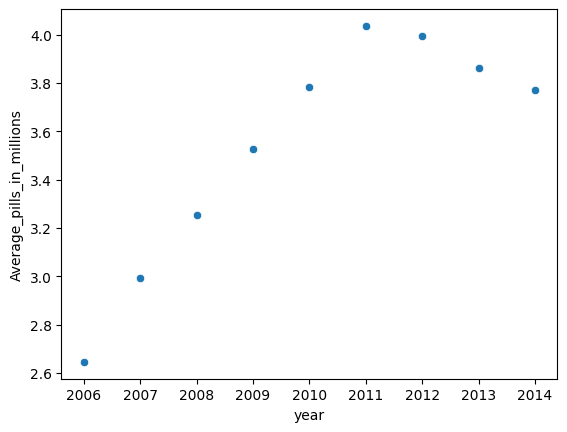

In [21]:
import seaborn as sns

sns.scatterplot(df, x = "year", y = "Average_pills_in_millions")

## Question 4

In [5]:
import rpy2
import rpy2.rinterface as ri

In [6]:
import rpy2.robjects as ro

ValueError: openrlib.R_HOME cannot be None.